In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yadneshmundhada","key":"b8b6f5ac1e548b716da83b811e5cee1c"}'}

In [ ]:
import tensorflow as tf
tf.__version__

!sudo pip3 install keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
device_list = tf.test.gpu_device_name()
device_list

'/device:GPU:0'

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -f train.zip.001 -p /content -c diabetic-retinopathy-detection
!7z x train.zip.001.zip
!rm train.zip.001.zip
!7z x train.zip.001
!rm train.zip.001

100% 7.81G/7.81G [02:38<00:00, 52.1MB/s]
100% 7.81G/7.81G [02:38<00:00, 53.0MB/s]

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 8391159087 bytes (8003 MiB)

Extracting archive: train.zip.001.zip
--
Path = train.zip.001.zip
Type = zip
Physical Size = 8391159087
64-bit = +

  0%      0% - train.zip.001                      1% - train.zip.001                      2% - train.zip.001                      3% - train.zip.001                      4% - train.zip.001                      5% - train.zip.001                      

In [ ]:
! kaggle competitions download -f train.zip.002 -p /content -c diabetic-retinopathy-detection
!7z x train.zip.002.zip
!rm train.zip.002.zip
!7z x train.zip.002
!rm train.zip.002

In [ ]:
! kaggle competitions download -f train.zip.003 -p /content -c diabetic-retinopathy-detection
!7z x train.zip.003.zip
!rm train.zip.003.zip
!7z x train.zip.003
!rm train.zip.003

In [ ]:
! kaggle competitions download -f train.zip.004 -p /content -c diabetic-retinopathy-detection
!7z x train.zip.004.zip
!rm train.zip.004.zip
!7z x train.zip.004
!rm train.zip.004

In [ ]:
! kaggle competitions download -f train.zip.005 -p /content -c diabetic-retinopathy-detection
!7z x train.zip.005.zip
!rm train.zip.005.zip
!7z x train.zip.005
!rm train.zip.005

In [ ]:
! kaggle competitions download -f trainLabels.csv.zip -p /content -c diabetic-retinopathy-detection
! unzip /content/trainLabels.csv.zip
! rm trainLabels.csv.zip

  0% 0.00/69.4k [00:00<?, ?B/s]
100% 69.4k/69.4k [00:00<00:00, 51.0MB/s]
Archive:  /content/trainLabels.csv.zip
  inflating: trainLabels.csv         


In [ ]:
import pandas as pd
retina_df = pd.read_csv('/content/trainLabels.csv');
retina_df

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


In [ ]:
retina_df.values

array([['10_left', 0],
       ['10_right', 0],
       ['13_left', 0],
       ...,
       ['44348_right', 0],
       ['44349_left', 0],
       ['44349_right', 1]], dtype=object)

In [ ]:
# import os
# import numpy as np
# listing = os.listdir("../content/train") 
# np.size(listing)

8408

Create seperate directories for different classes

In [ ]:
import shutil
import sys
import os
train_dir=r'../content/train'
DR=r'../content/train/'
# if not os.path.exists(DR):
#   os.mkdir(DR)
for filename,class_name in retina_df.values:
  if(not os.path.exists(DR+str(class_name))):
    os.mkdir(DR+str(class_name))
  src = train_dir+'/'+filename+'.jpeg'
  dst = DR + str(class_name)+'/'+filename+'.jpeg'
  try:
    shutil.move(src,dst);
    print("done"+filename);
  except IOError as e:
    print('Unable to move')

In [ ]:
# import shutil
# import sys
# import os
# test_dir=r'../content/test'
# DT=r'../content/test/'
# for filename,class_name in df.values:
#   if(not os.path.exists(DT+str(class_name))):
#     os.mkdir(DT+str(class_name))
#   src = test_dir+'/'+filename+'.jpeg'
#   dst = DT + str(class_name)+'/'+filename+'.jpeg'
#   try:
#     shutil.move(src,dst);
#     print("done"+filename);
#   except IOError as e:
#     print('Unable to move')
#   except:
#     print('error:{}'.format(sys.exe_info()))

In [ ]:
from PIL import Image
from keras.preprocessing import image
import os
import numpy as np
import pandas as pd

from subprocess import check_output

Data Augmentation using Keras ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
img = Image.open('../content/train/0/10003_left.jpeg')
x=img.resize((200,200))
im=np.array(x.getdata()).reshape(1,200,200,3)
i = 0
for batch in datagen.flow(im, batch_size=1,
                          save_to_dir='../content/view', save_prefix='dr0', save_format='jpeg'):
    i += 1
    if i > 20:
        break

Various images generated which adds to the training images

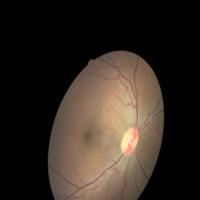

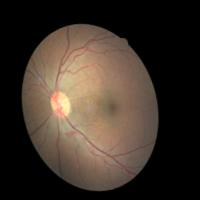

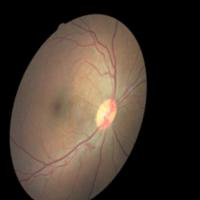

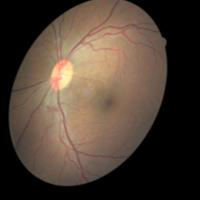

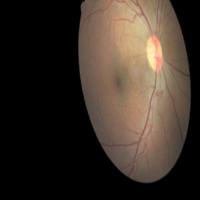

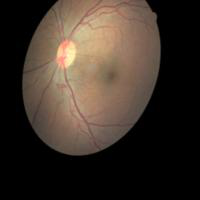

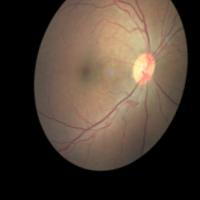

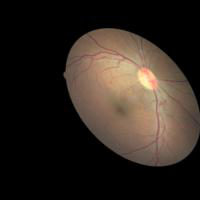

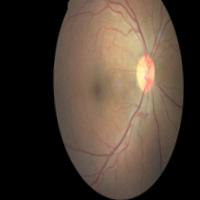

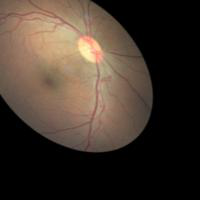

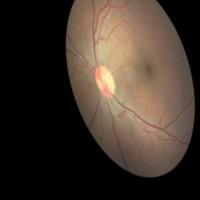

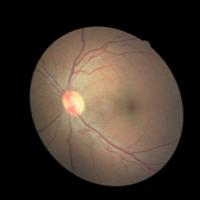

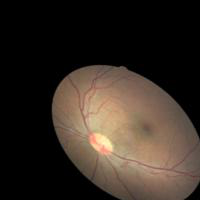

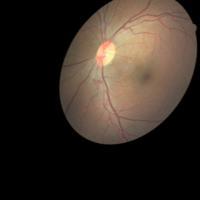

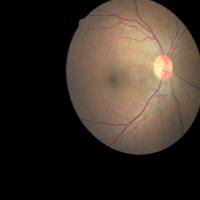

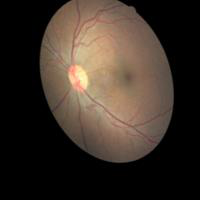

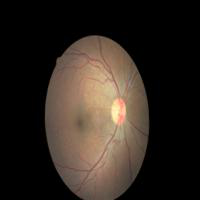

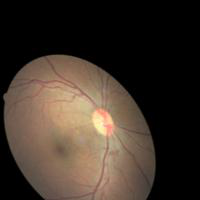

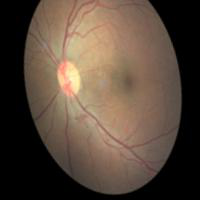

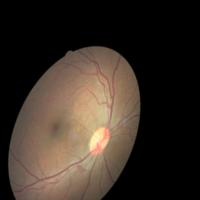

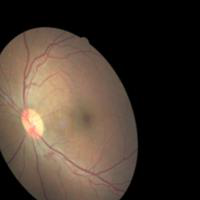

In [ ]:
# Image Augmentation
%matplotlib inline
from os import listdir
import PIL

imagesList = listdir('../content/view')
for image in imagesList:
  img = Image.open('../content/view/' + image)
  display(img)

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
batch_size = 32
nb_classes = 5
nb_epoch = 5
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        '../content/train',
        target_size=(200, 200), 
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')  

validation_generator = train_datagen.flow_from_directory(
        '../content/train',
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation')


Found 6728 images belonging to 5 classes.
Found 1680 images belonging to 5 classes.


# CNN Model

# Reduced Complexity of model, Applied Regularization

In [ ]:
from keras.optimizers import adam_v2
from keras.engine.sequential import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from keras import regularizers
img_rows, img_cols = 200, 200

model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),padding='valid',input_shape=(img_rows, img_cols, 3),kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense(nb_classes),kernel_regularizer=regularizers.l2(0.0001))
model.add(Activation('softmax'))
opt=adam_v2.Adam(lr=0.00001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
batch_size=32
model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs=10,
    validation_data = validation_generator, 
    validation_steps = 50
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
100/100 [==============================] - 569s 6s/step - loss: 0.9176 - accuracy: 0.7321 - val_loss: 0.9237 - val_accuracy: 0.7356
Epoch 2/10
100/100 [==============================] - 568s 6s/step - loss: 0.9027 - accuracy: 0.7305 - val_loss: 0.9235 - val_accuracy: 0.7294
Epoch 3/10
100/100 [==============================] - 564s 6s/step - loss: 0.8996 - accuracy: 0.7334 - val_loss: 0.9039 - val_accuracy: 0.7337
Epoch 4/10
100/100 [==============================] - 555s 6s/step - loss: 0.8716 - accuracy: 0.7387 - val_loss: 0.9051 - val_accuracy: 0.7325
Epoch 5/10
100/100 [==============================] - 553s 6s/step - loss: 0.9092 - accuracy: 0.7236 - val_loss: 0.9017 - val_accuracy: 0.7356
Epoch 6/10
100/100 [==============================] - 549s 6s/step - loss: 0.9020 - accuracy: 0.7261 - val_loss: 0.9245 - val_accuracy: 0.7306
Epoch 7/10
100/100 [==============================] - 545s 5s/step - loss: 0.8716 - accuracy: 0.7358 - val_loss: 0.8937 - val_accuracy: 0.7300

In [ ]:
def b_model(hp):
  model=Sequential()
  model.add(Conv2D(
                filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16), 
                kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
                activation='relu',
                input_shape=(200,200,3),
                kernel_regularizer=regularizers.l1(0.0001),
                padding='same'))
  for i in range(hp.Int('num_layers',1,20)):
    model.add(Conv2D(
                filters=hp.Int('conv_2_filter', min_value=32, max_value=512, step=16), 
                kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
                activation='relu',
                kernel_regularizer=regularizers.l1(0.0001),
                padding='same'))
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool),padding='same'))
    model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(
          units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
          activation='relu',
          kernel_regularizer=regularizers.l1(0.0001)))
  model.add(Dropout(0.5))
  model.add(Dense(5,activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
  model.compile(optimizer=adam_v2.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3,1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
  return model;

In [ ]:
train_img,train_labels = train_generator.next()
test_img,test_labels = validation_generator.next()

In [ ]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
tuner_new = RandomSearch(b_model,
                    objective='val_accuracy',
                    max_trials=10,
                    directory='out',
                    project_name='DR'
                    )

In [ ]:
tuner_new.search(train_img,train_labels,
            epochs=5,
            validation_data=(test_img,test_labels),
            batch_size=32)

# VGG16 architecture

In [ ]:
from keras.optimizers import adam_v2
from keras.engine.sequential import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
img_rows, img_cols = 200, 200
# VGG16
model = Sequential()
model.add(Conv2D(input_shape=(200,200,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=5, activation="softmax"))
opt=adam_v2.Adam(lr=0.00001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.build((None,200,200,3))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 200, 200, 64)      1792      
                                                                 
 conv2d_16 (Conv2D)          (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 100, 100, 64)     0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 100, 100, 128)     73856     
                                                                 
 conv2d_18 (Conv2D)          (None, 100, 100, 128)     147584    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 50, 50, 128)      0         
 2D)                                                  

Saving the parameters and early stopping if 'val_accuracy' does not change above a cerain limit

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
batch_size=16
checkpoint = ModelCheckpoint("save.h5", monitor='val_accuracy', 
                             verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=2, verbose=1, mode='auto')
mod = model.fit_generator(steps_per_epoch=100,
                           generator=train_generator, 
                           validation_data= validation_generator, 
                           validation_steps=50,
                           epochs=10,callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.9221 - accuracy: 0.7267
Epoch 1: val_accuracy improved from -inf to 0.73062, saving model to save.h5
100/100 [==============================] - 580s 6s/step - loss: 0.9221 - accuracy: 0.7267 - val_loss: 0.9093 - val_accuracy: 0.7306
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 0.8823 - accuracy: 0.7371
Epoch 2: val_accuracy did not improve from 0.73062
100/100 [==============================] - 577s 6s/step - loss: 0.8823 - accuracy: 0.7371 - val_loss: 0.9193 - val_accuracy: 0.7287
Epoch 3/10
100/100 [==============================] - ETA: 0s - loss: 0.8979 - accuracy: 0.7267
Epoch 3: val_accuracy improved from 0.73062 to 0.73188, saving model to save.h5
100/100 [==============================] - 575s 6s/step - loss: 0.8979 - accuracy: 0.7267 - val_loss: 0.8891 - val_accuracy: 0.7319
Epoch 4/10
100/100 [==============================] - ETA: 0s - loss: 0.8717 - accuracy: 0.7356
Epoch 4: val

# Class Imbalance Problem

In [ ]:
import os
import numpy as np
one = os.listdir("../content/train/0") 
two = os.listdir("../content/train/1") 
three = os.listdir("../content/train/2") 
four = os.listdir("../content/train/3") 
five = os.listdir("../content/train/4") 
print(np.size(one))
print(np.size(two))
print(np.size(three))
print(np.size(four))
print(np.size(five))

6150
588
1283
221
166


In [ ]:
Y_train=train_generator.classes
np.unique(Y_train)

array([0, 1, 2, 3, 4], dtype=int32)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(Y_train),
                                                  y=Y_train)
class_weights = dict(zip(np.unique(Y_train), class_weights))
class_weights

{0: 0.2734959349593496,
 1: 2.856900212314225,
 2: 1.310223953261928,
 3: 7.6022598870056495,
 4: 10.117293233082707}

In [ ]:
from keras.optimizers import adam_v2
from keras.engine.sequential import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
img_rows, img_cols = 200, 200
# image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator()

model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv),padding='valid',input_shape=(img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

# model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

# model.add(Conv2D(nb_filters*2, (nb_conv, nb_conv)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

model.add(Flatten())
# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
opt=adam_v2.Adam(lr=0.00001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
batch_size=32
model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs=10,
    validation_data = validation_generator, 
    validation_steps = 50,
    class_weight=class_weights
    )

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
batch_size=16
checkpoint = ModelCheckpoint("save.h5", monitor='val_accuracy', 
                             verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=2, verbose=1, mode='auto')
mod = model.fit_generator(steps_per_epoch=100,
                           generator=train_generator, 
                           validation_data= validation_generator, 
                           validation_steps=50,
                           epochs=10,callbacks=[checkpoint,early],
                           class_weight=class_weights)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 1.6048 - accuracy: 0.2597
Epoch 1: val_accuracy improved from -inf to 0.70750, saving model to save.h5
100/100 [==============================] - 599s 6s/step - loss: 1.6048 - accuracy: 0.2597 - val_loss: 1.6074 - val_accuracy: 0.7075
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 1.5783 - accuracy: 0.7394
Epoch 2: val_accuracy improved from 0.70750 to 0.73563, saving model to save.h5
100/100 [==============================] - 619s 6s/step - loss: 1.5783 - accuracy: 0.7394 - val_loss: 1.6067 - val_accuracy: 0.7356
Epoch 3/10
100/100 [==============================] - ETA: 0s - loss: 1.6596 - accuracy: 0.5941
Epoch 3: val_accuracy did not improve from 0.73563
100/100 [==============================] - 624s 6s/step - loss: 1.6596 - accuracy: 0.5941 - val_loss: 1.6087 - val_accuracy: 0.1150
Epoch 4/10
100/100 [==============================] - ETA: 0s - loss: 1.5748 - accuracy: 0.2241
Epoch 4: val

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

In [ ]:
tf.compat.v1.reset_default_graph()